In [1]:
#import libaries
from pandas_datareader  import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock symbols/tickers in the portfolio
#FAANG
assets = ['AAPL','MSFT', 'WMT']

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import yfinance as yf
import pandas as pd

# Set the start and end date
start_date = '2013-01-01'
end_date = '2022-12-12'

# Define the ticker list
tickers_list = ['AAPL','MSFT', 'WMT']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, start_date,end_date)['Adj Close']
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,WMT
Date,,,
2013-01-02,16.862823,22.774685,55.454205
2013-01-03,16.649982,22.469591,55.101837
2013-01-04,16.186199,22.049055,55.310062
2013-01-07,16.090990,22.007833,54.781467
2013-01-08,16.134296,21.892397,54.933647
...,...,...,...
2022-12-05,146.630005,250.199997,151.080460
2022-12-06,142.910004,245.119995,149.327072
2022-12-07,140.940002,244.369995,148.550003


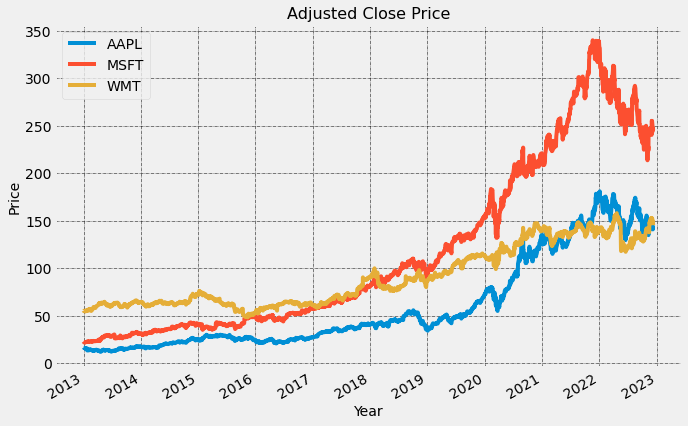

In [6]:
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [7]:
#show the return 
returns=data.pct_change()
returns.head()

,AAPL,MSFT,WMT
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,-0.012622,-0.013396,-0.006354
2013-01-04,-0.027855,-0.018716,0.003779
2013-01-07,-0.005882,-0.001870,-0.009557
2013-01-08,0.002691,-0.005245,0.002778


In [8]:
weight_portfolio = [0.2, 0.7, 0.1] 

In [9]:
variance_matrix = returns.cov()*252
variance_matrix

,AAPL,MSFT,WMT
AAPL,0.084283,0.049123,0.018535
MSFT,0.049123,0.073032,0.019534
WMT,0.018535,0.019534,0.042317


In [10]:
# Computing portfolio variance
portfolio_variance = np.transpose(weight_portfolio)@variance_matrix@weight_portfolio

# Computing portfolio volatility (Risk) 
portfolio_volatility = np.sqrt(portfolio_variance)

print("Portfolio Variance is", portfolio_variance) 
print("Portfolio Volatility (Risk) is", portfolio_volatility)

Portfolio Variance is 0.056810673265231246
Portfolio Volatility (Risk) is 0.23834989671747553


In [11]:
# Initialize an empty list for storing the portfolio returns 
port_returns = []

# Initialize an empty list for storing the portfolio volatility 
port_volatility = []

# Initialize an empty list for storing the portfolio weights 
port_weights = []

num_assets = len (data.columns) 
num_portfolios = 10000

# Computing the individual asset return 
individual_rets = data.resample('Y').last().pct_change().mean()

In [12]:
for port in range(num_portfolios):
    #Randomly generate weigh combination 
    weights = np.random.random(num_assets)
    # Normalize weight so that they sum to 1
    weights = weights/np.sum(weights) 
    port_weights.append(weights)
    # Returns are the dot product of individual expected returns of asset and its weights 
    returns = np.dot (weights, individual_rets)
    port_returns.append(returns)

    #Computing Portfolio Variance
    var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    #Daily standard deviation: volatility is square root of variance
    sd = np.sqrt(var) 
    
    # Annualizing the standard deviation will give us the volatility 
    ann_sd = sd*np.sqrt(250) 
    port_volatility.append(ann_sd)

In [13]:
# Creating a dictionary of returns and volatility 
data_result = {'Returns' :port_returns, 'Volatility' :port_volatility}

for counter, symbol in enumerate (data.columns.tolist()):
    data_result[symbol+' weight'] = [w[counter] for w in port_weights]

In [14]:
# Converting the dictionary to dataframe 
portfolios_V1 = pd.DataFrame(data_result) 
portfolios_V1.head()

,Returns,Volatility,AAPL weight,MSFT weight,WMT weight
0,0.275439,3.876125,0.181708,0.752112,0.066180
1,0.236364,3.286099,0.202748,0.494839,0.302412
2,0.241415,3.286248,0.345160,0.357519,0.297321
3,0.277889,3.791517,0.306706,0.619784,0.073510
4,0.217387,3.083077,0.319408,0.244788,0.435804


Text(0, 0.5, 'Expected Returns')

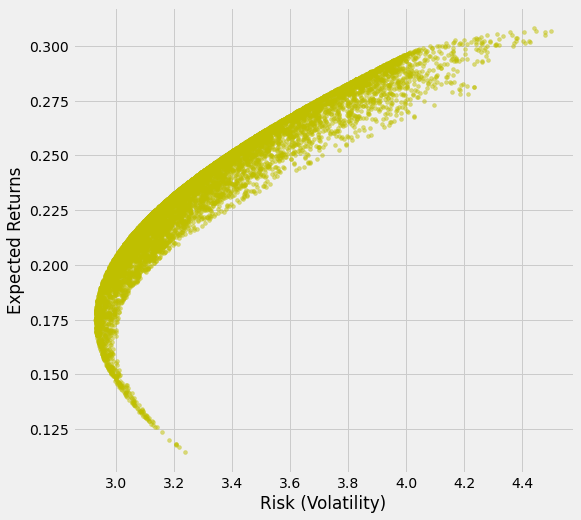

In [15]:
# Plot efficient frontier 
portfolios_V1.plot.scatter(x='Volatility', y='Returns', marker='o', color='y', s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")

In [16]:
# MIN VOLATILITY
# idxmin() gives us the minimum value in the column that has been specified. 
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
min_vol_port

Returns        0.175012
Volatility     2.929782
AAPL weight    0.148121
MSFT weight    0.193922
WMT weight     0.657957
Name: 832, dtype: float64

In [17]:
#Finding the optimal portfolio: Highest SHARPE RATIO
# risk factor
rf = 0.01
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

Returns        0.278465
Volatility     3.738745
AAPL weight    0.470427
MSFT weight    0.430781
WMT weight     0.098791
Name: 6223, dtype: float64

Text(0, 0.5, 'Expected Returns')

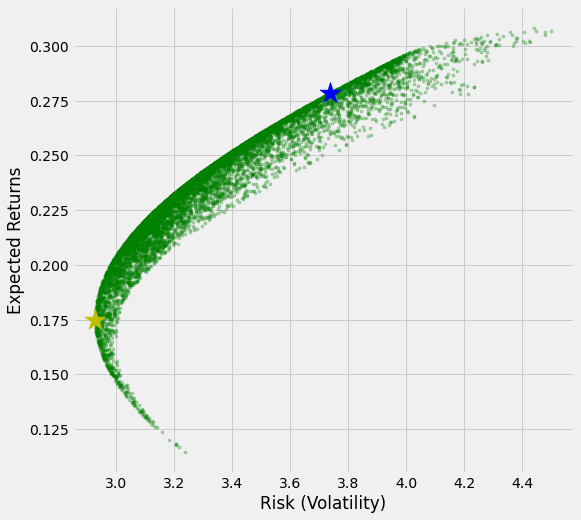

In [18]:
# Plotting optimal portfolio and minimum volatility
plt.subplots(figsize=(8, 8))
plt.scatter(portfolios_V1 [ 'Volatility'], portfolios_V1['Returns' ], marker='o', s=10, alpha=0.3, color = 'green')
plt.scatter (min_vol_port[1], min_vol_port[0], color='y', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='b', marker='*', s=500)
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")